# Decay factor

In [1]:
library(tidyverse, magrittr)
library(ggdark)
library(future)
library(furrr)
future::plan(multicore)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
source("../R/alg/cma-es-csa.R")
source("../R/alg/cma-es-expth.R")
source("../R/alg/cma-es-tpat.R")
source("../R/eval-funcs.R")
source("../R/plot-funcs.R")
options(repr.plot.width=20, repr.plot.height=10)

In [25]:
get_sigma_ratio = function(alg, func, x0, ...) {
    result = 
        alg(x0, fn = function(x) func(x), lower = -100, upper = 100, ...)
    tibble::tibble(
        t = 1:length(result$diagnostic$sigma),
        sigma = result$diagnostic$sigma
    ) %>% 
    dplyr::mutate(sigma_lead = dplyr::lead(sigma)) %>%
    dplyr::mutate(ratio = sigma_lead / sigma)
}
plot_decay = function(df) {
    df %>%
    ggplot2::ggplot() +
    ggplot2::geom_line(aes(x = t, y = ratio, col = method)) + 
    ggdark::dark_theme_bw() + 
    ggplot2::theme(
        axis.title = ggplot2::element_text(size = 15, face = "bold"),
        axis.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.text = ggplot2::element_text(size = 15, face = "bold"),
        legend.title = ggplot2::element_text(size = 15, face = "bold"),
    )
} 

## Sphere 

In [3]:
x0 = rep(100, 10) 

In [19]:
sphere_decay_ppmf = get_sigma_ratio(alg = cma_es_ppmf, func = sphere_func, x0 = x0)
sphere_decay_csa = get_sigma_ratio(alg = cma_es_csa, func = sphere_func, x0 = x0)
sphere_decay_tpat = get_sigma_ratio(alg = cma_es_tpat, func = sphere_func, x0 = x0)

## Linear

In [20]:
linear_decay_ppmf = get_sigma_ratio(alg = cma_es_ppmf, func = linear_func, x0 = x0)
linear_decay_csa = get_sigma_ratio(alg = cma_es_csa, func = linear_func, x0 = x0)
linear_decay_tpat = get_sigma_ratio(alg = cma_es_tpat, func = linear_func, x0 = x0)

## Random

In [21]:
random_decay_ppmf = get_sigma_ratio(alg = cma_es_ppmf, func = noise_func, x0 = x0)
random_decay_csa = get_sigma_ratio(alg = cma_es_csa, func = noise_func, x0 = x0)
random_decay_tpat = get_sigma_ratio(alg = cma_es_tpat, func = noise_func, x0 = x0)

In [22]:
ppmf_all = 
    dplyr::bind_rows(
        sphere_decay_ppmf %>% dplyr::mutate(method = "sphere"),
        linear_decay_ppmf %>% dplyr::mutate(method = "linear"),
        random_decay_ppmf %>% dplyr::mutate(method = "noise")
    )

In [23]:
csa_all = 
    dplyr::bind_rows(
        sphere_decay_csa %>% dplyr::mutate(method = "sphere"),
        linear_decay_csa %>% dplyr::mutate(method = "linear"),
        random_decay_csa %>% dplyr::mutate(method = "noise")
    )

In [24]:
tpat_all = 
    dplyr::bind_rows(
        sphere_decay_tpat %>% dplyr::mutate(method = "sphere"),
        linear_decay_tpat %>% dplyr::mutate(method = "linear"),
        random_decay_tpat %>% dplyr::mutate(method = "noise")
    )

Warning message:
“Removed 797 row(s) containing missing values (geom_path).”


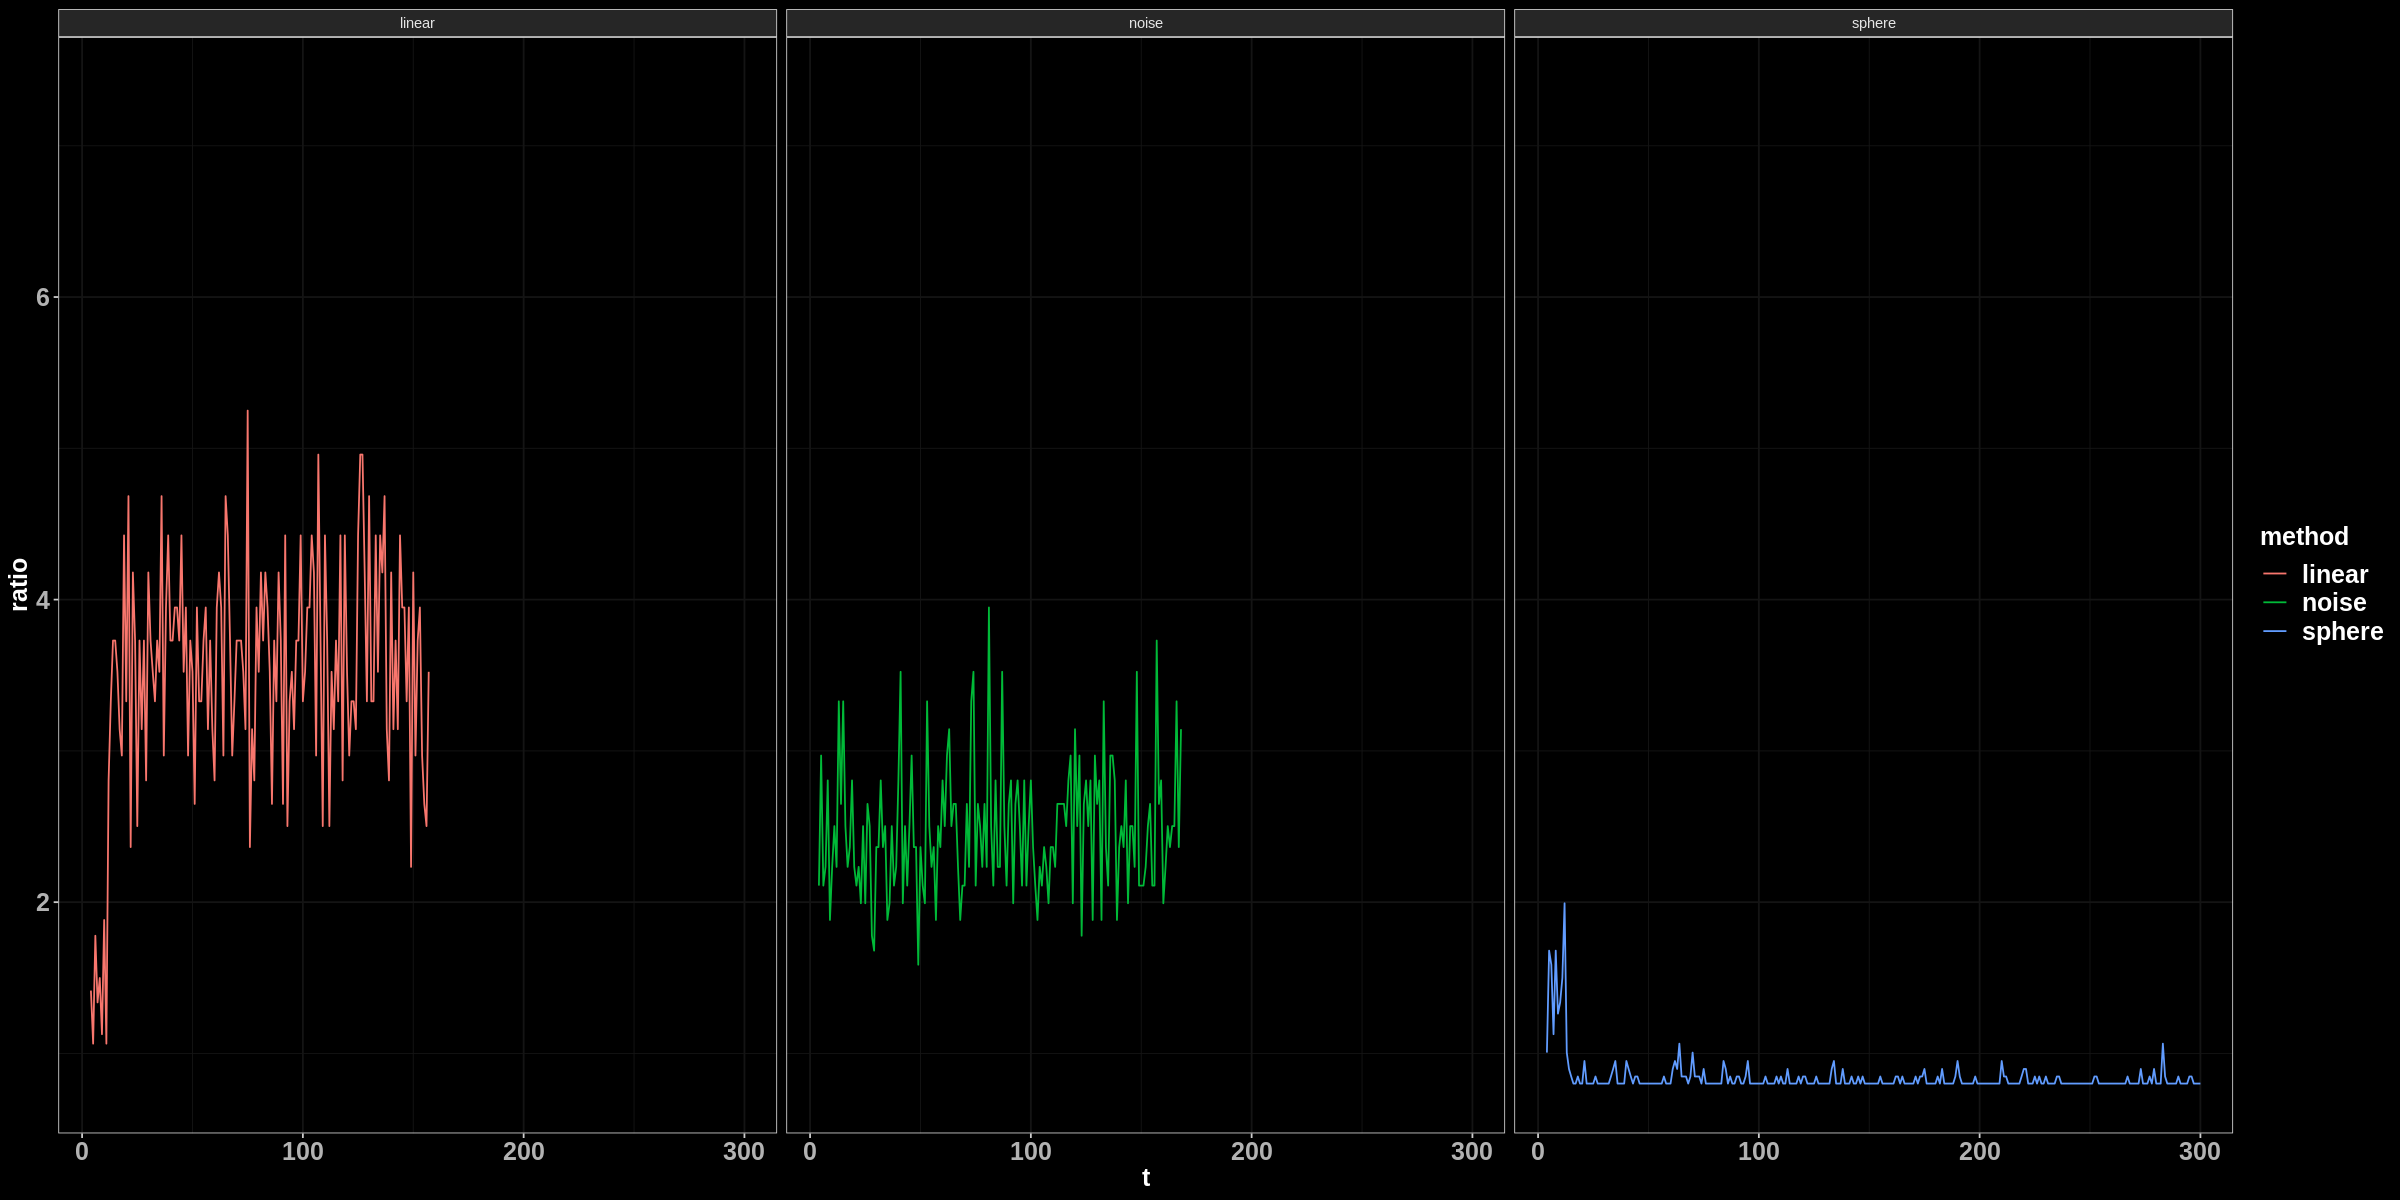

In [32]:
ppmf_all %>% plot_decay() + ggplot2::facet_wrap( ~ method) + xlim(4, 300)

Warning message:
“Removed 3 row(s) containing missing values (geom_path).”


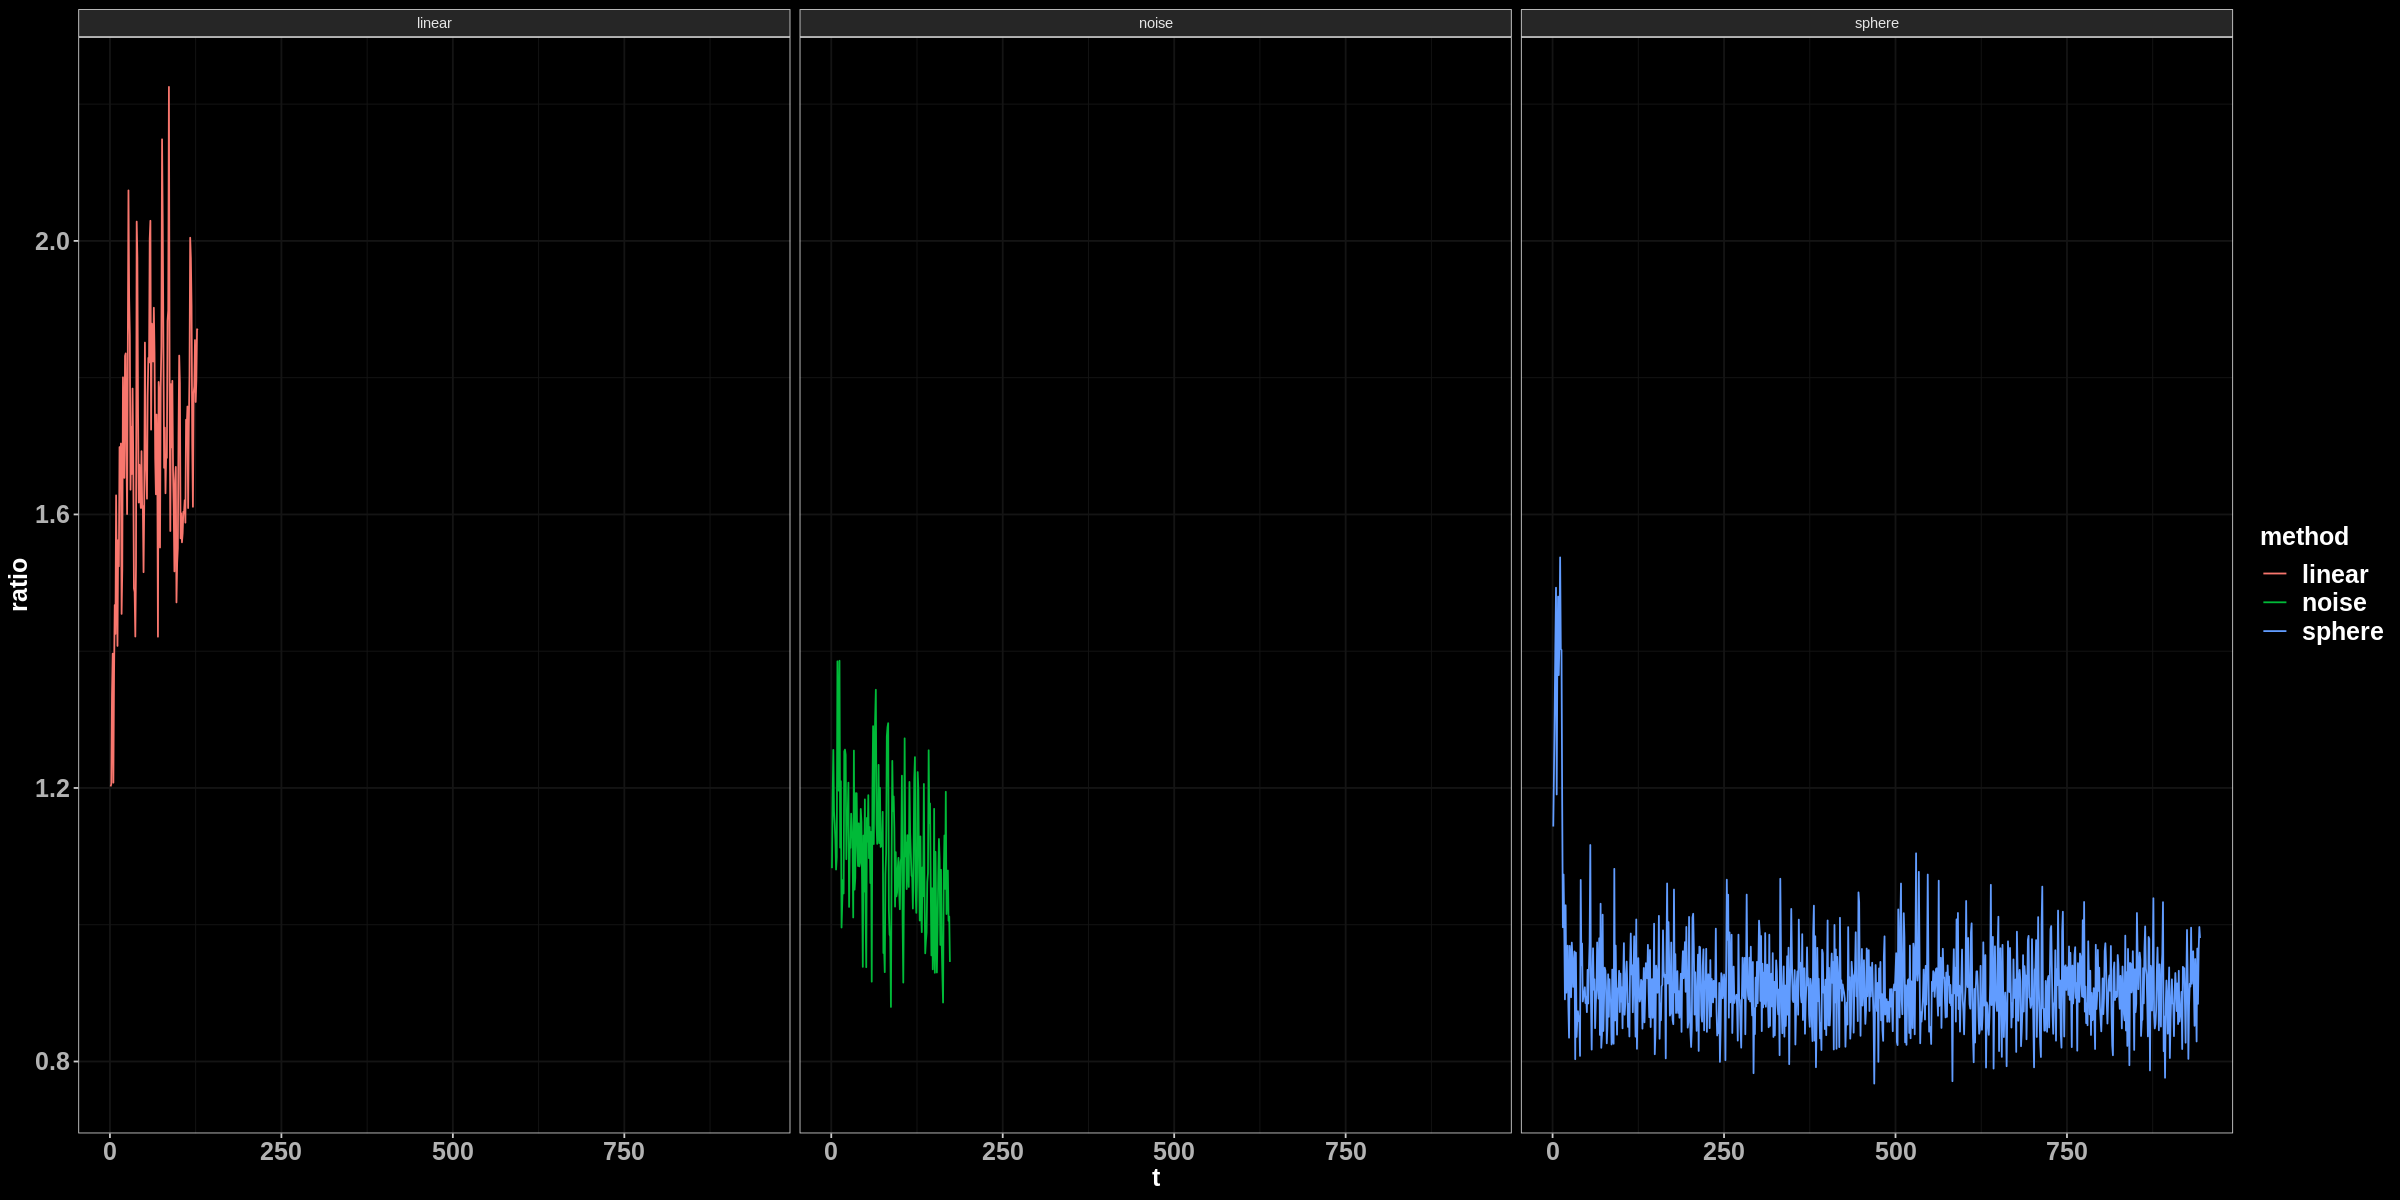

In [31]:
csa_all %>% plot_decay() + ggplot2::facet_wrap( ~ method)

Warning message:
“Removed 3 row(s) containing missing values (geom_path).”


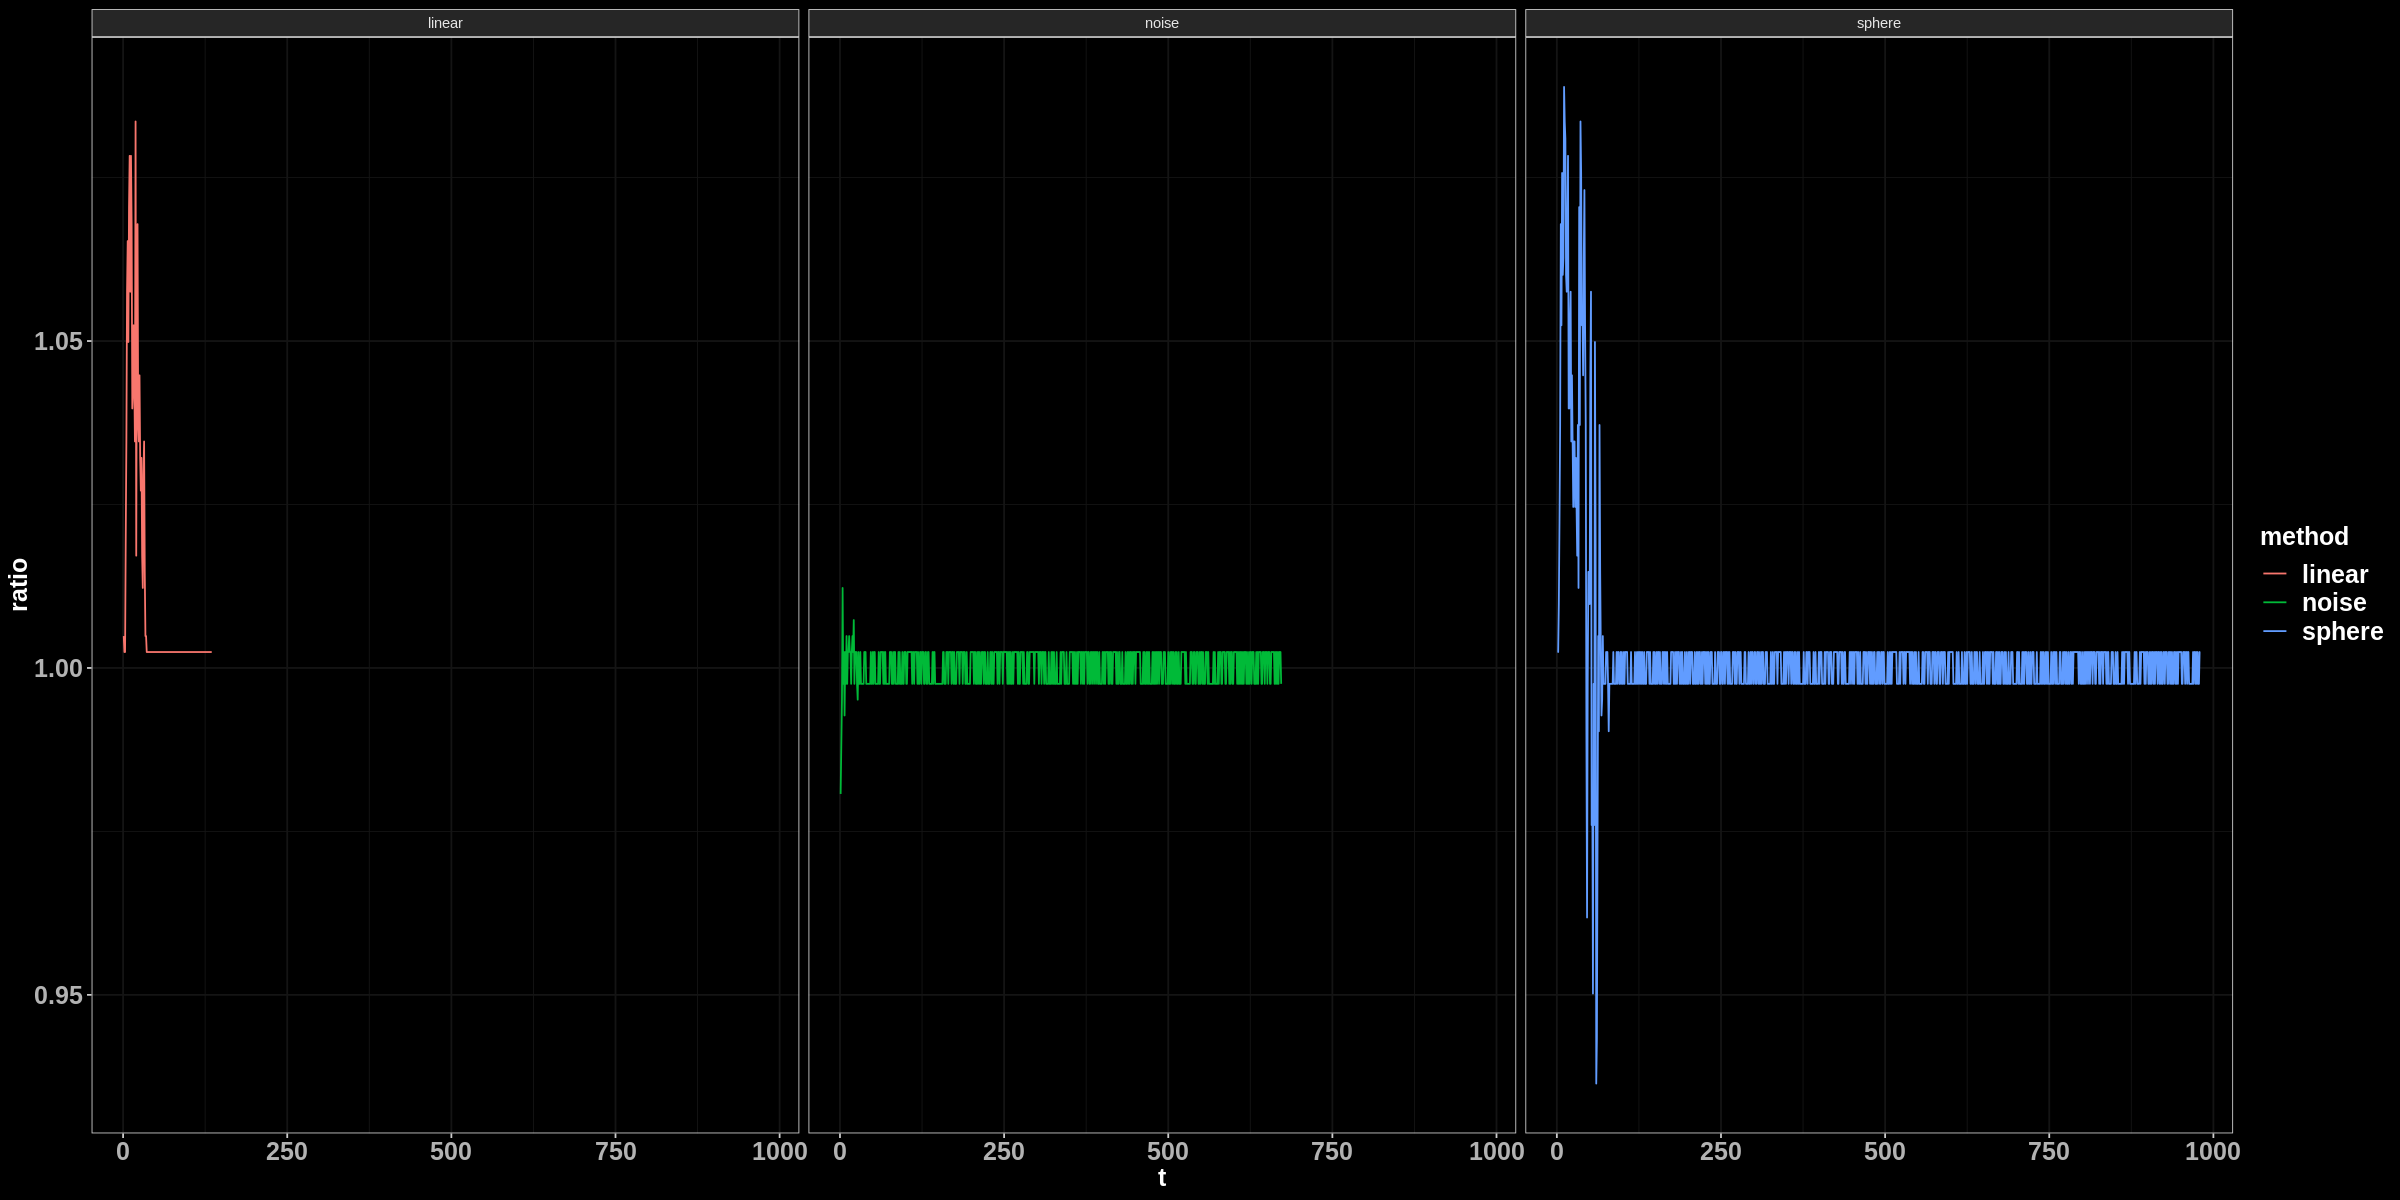

In [30]:
tpat_all %>% plot_decay() + ggplot2::facet_wrap( ~ method)